In [1]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
#load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #train-test 0.75-0.25 split

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [4]:
#normalize data by scaling

x_train = x_train / 255
x_test = x_test / 255

In [5]:
#flatten x grids into longitutdal input

image_vector_size = 28*28

x_train = x_train.reshape(len(x_train), image_vector_size)
x_test = x_test.reshape(len(x_test), image_vector_size)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                75360     
                                                                 
 dense_5 (Dense)             (None, 96)                9312      
                                                                 
 dense_6 (Dense)             (None, 96)                9312      
                                                                 
 dense_7 (Dense)             (None, 10)                970       
                                                                 
Total params: 94,954
Trainable params: 94,954
Non-trainable params: 0
_________________________________________________________________


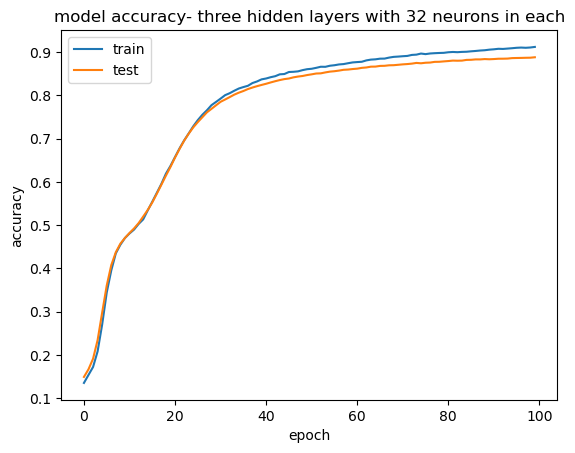

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define Neural Network model architecture with three hidden layers with 32 neurons in each

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()
model.add(Dense(96, activation='relu', input_shape=(image_size,)))
model.add(Dense(96, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

#compile and train the neural network model

model.compile(optimizer="sgd", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history= model.fit(x_train, y_train, batch_size=500, epochs=100, validation_split=0.9, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy- three hidden layers with 32 neurons in each')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()